In [2]:
%load_ext autoreload
%autoreload 2
!pwd
import os
import sys 
if os.path.abspath("../../../") not in sys.path:
    sys.path.append(os.path.abspath("../../../")) 

import os
import networkx as nx
from rwtools.nemesis.graph.nemesis_node import AbstractNemesisNode
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
from rwtools.nemesis.control_flow_graph import ControlFlowGraph


/home/gilles/git-repos/NemesisRetroWrite/retrowrite/rwtools/nemesis/samples_notebooks


In [3]:
import sys 
sys.executable

'/home/gilles/git-repos/NemesisRetroWrite/retrowrite/venv/bin/python'

In [4]:
from test_main import setup 

binary = os.path.abspath("./loop_test/loop_test")
outputfile = "./loop_test/loop_test.s"
loader, rw = setup(binary, outputfile)
rw.dump()

[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3e20
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8


[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3e20
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8


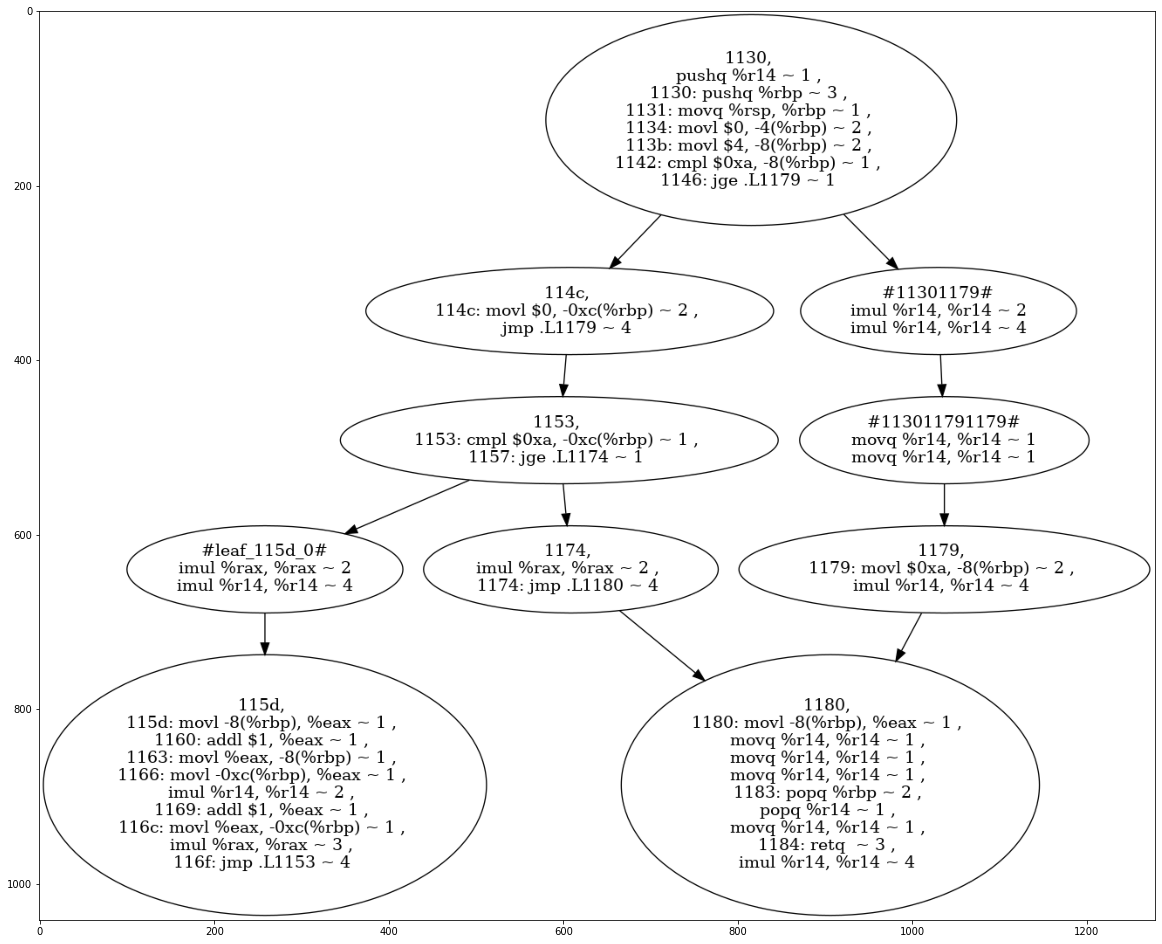

In [39]:
from rwtools.nemesis.nemesistool import NemesisInstrument
figs, axs = plt.subplots(1, figsize=(20,20))

binary = os.path.abspath("./loop_test/loop_test")
outputfile = "./loop_test.s"

nemesis = NemesisInstrument(binary, outputfile)



target_node = nemesis.cfg.get_node('1130')


nemesis.cfg.unwind_graph()
nemesis.cfg.insert_nodes()
nemesis.cfg.equalize_branches()

# nemesis.align(target_node)

a = nemesis.cfg.get_node("1174")
b = nemesis.cfg.get_node("1179")

# nemesis._align_nodes([a, b])
nemesis.align(target_node)
# nemesis.instrument(target_node)
axs.imshow(nemesis.render_cfg())

    
# axs[1].imshow(nemesis.render_cfg())
# axs.imshow(nemesis.render_cfg())

# nemesis.dump()

[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3df8
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8


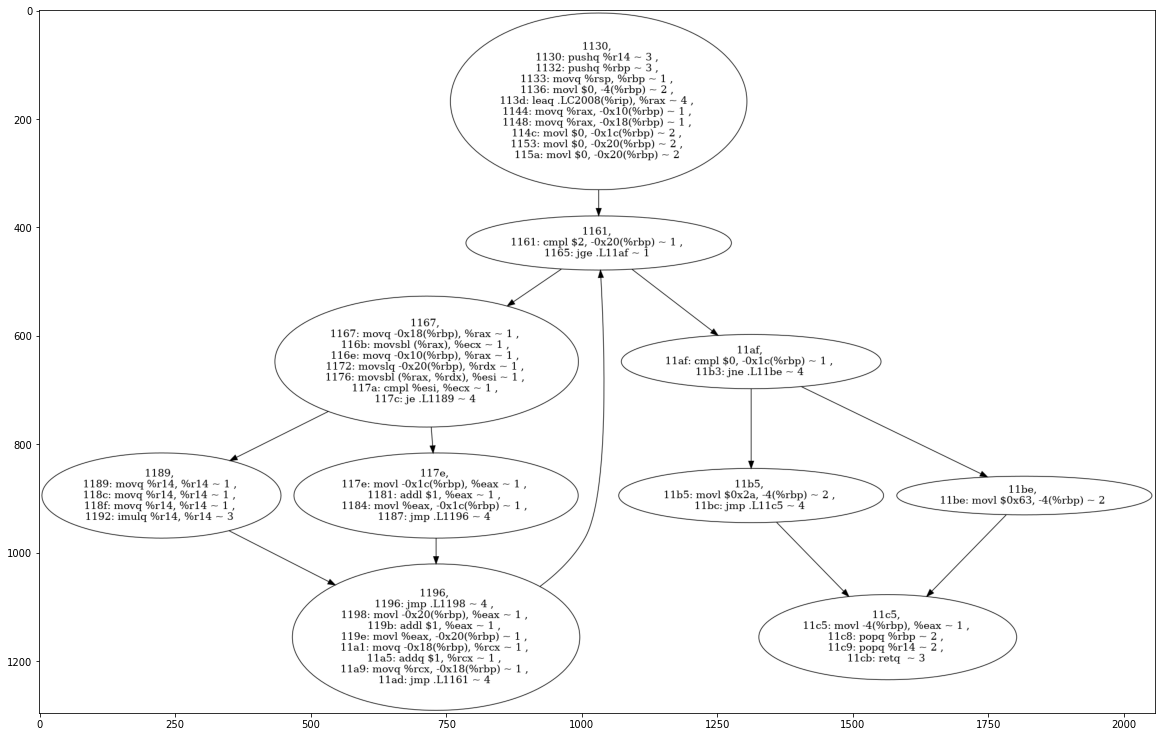

In [16]:
figs, axs = plt.subplots(1, figsize=(20,20))

binary = os.path.abspath("./a.out")
outputfile = "./password_comparison.s"

nemesis = NemesisInstrument(binary, outputfile)

axs.imshow(nemesis.render_cfg())

# EVERYTHING BELOW THIS IS OLD

[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3e20
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8


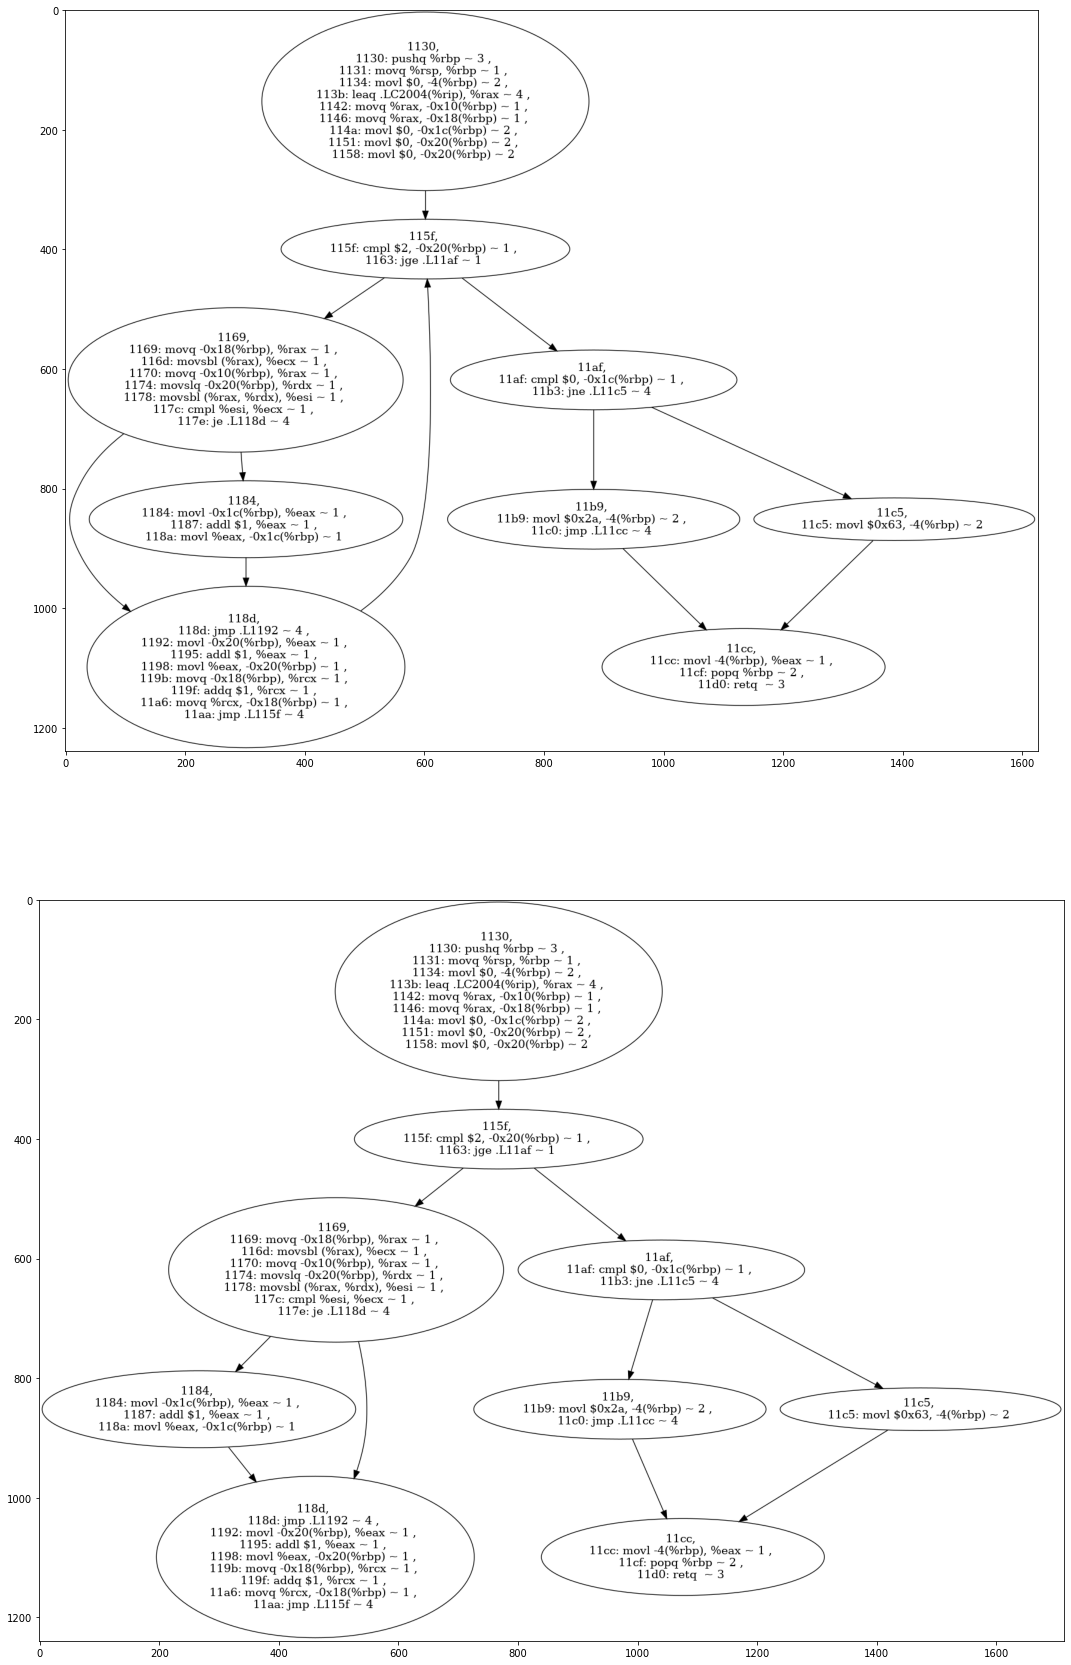

In [5]:
from rwtools.nemesis.graph.utils import create_graph_structure
from rwtools.nemesis.graph.utils import to_img
from rwtools.nemesis.graph.balance import balance_branching_point


outputfile = "./password_comparison/password_comparison_rw.s"
loader, rw = setup(binary, outputfile)
function_names = loader.container.function_names
nodes, graph = create_graph_structure(loader.container, "main")
fig, axs = plt.subplots(2, figsize=(30, 30))

control_flow_graph = ControlFlowGraph(nodes=nodes, graph=graph)

control_flow_graph.merge_consecutive_nodes()
axs[0].imshow(to_img(graph))


control_flow_graph.unwind_graph()

axs[1].imshow(to_img(graph))

# control_flow_graph.insert_nodes()
# control_flow_graph.equalize_branches()


# target_node = control_flow_graph.get_node('1169')
# control_flow_graph.set_stopping_nodes(target_node)


# balance_branching_point(control_flow_graph, target_node)
# # control_flow_graph.restore_cycles()
# axs[2].imshow(to_img(graph))


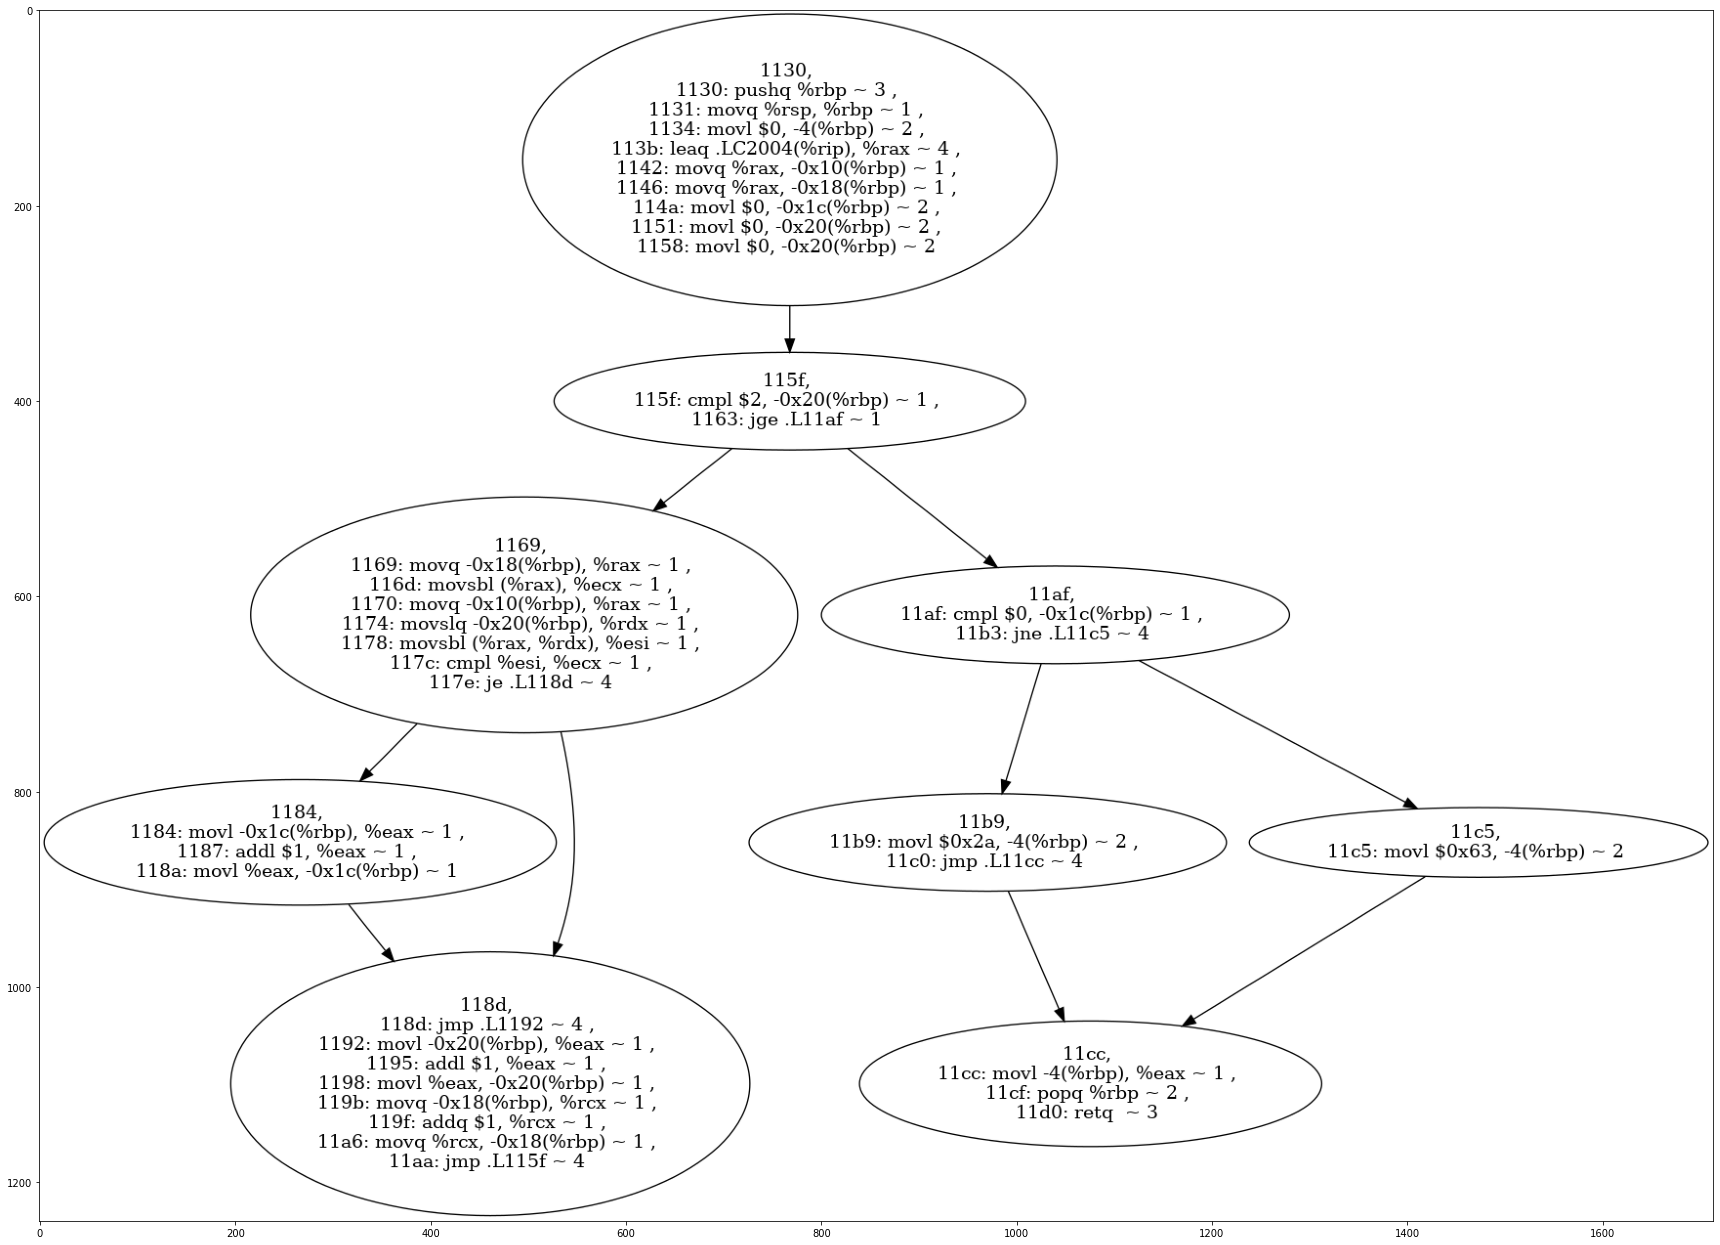

In [6]:
fig, axs = plt.subplots(1, figsize=(30, 30))
axs.imshow(to_img(graph))


[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3e20
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8
warning, no nop instruction found with latency 4
warning, no nop instruction found with latency 4
warning, no nop instruction found with latency 4
warning, no nop instruction found with latency 4


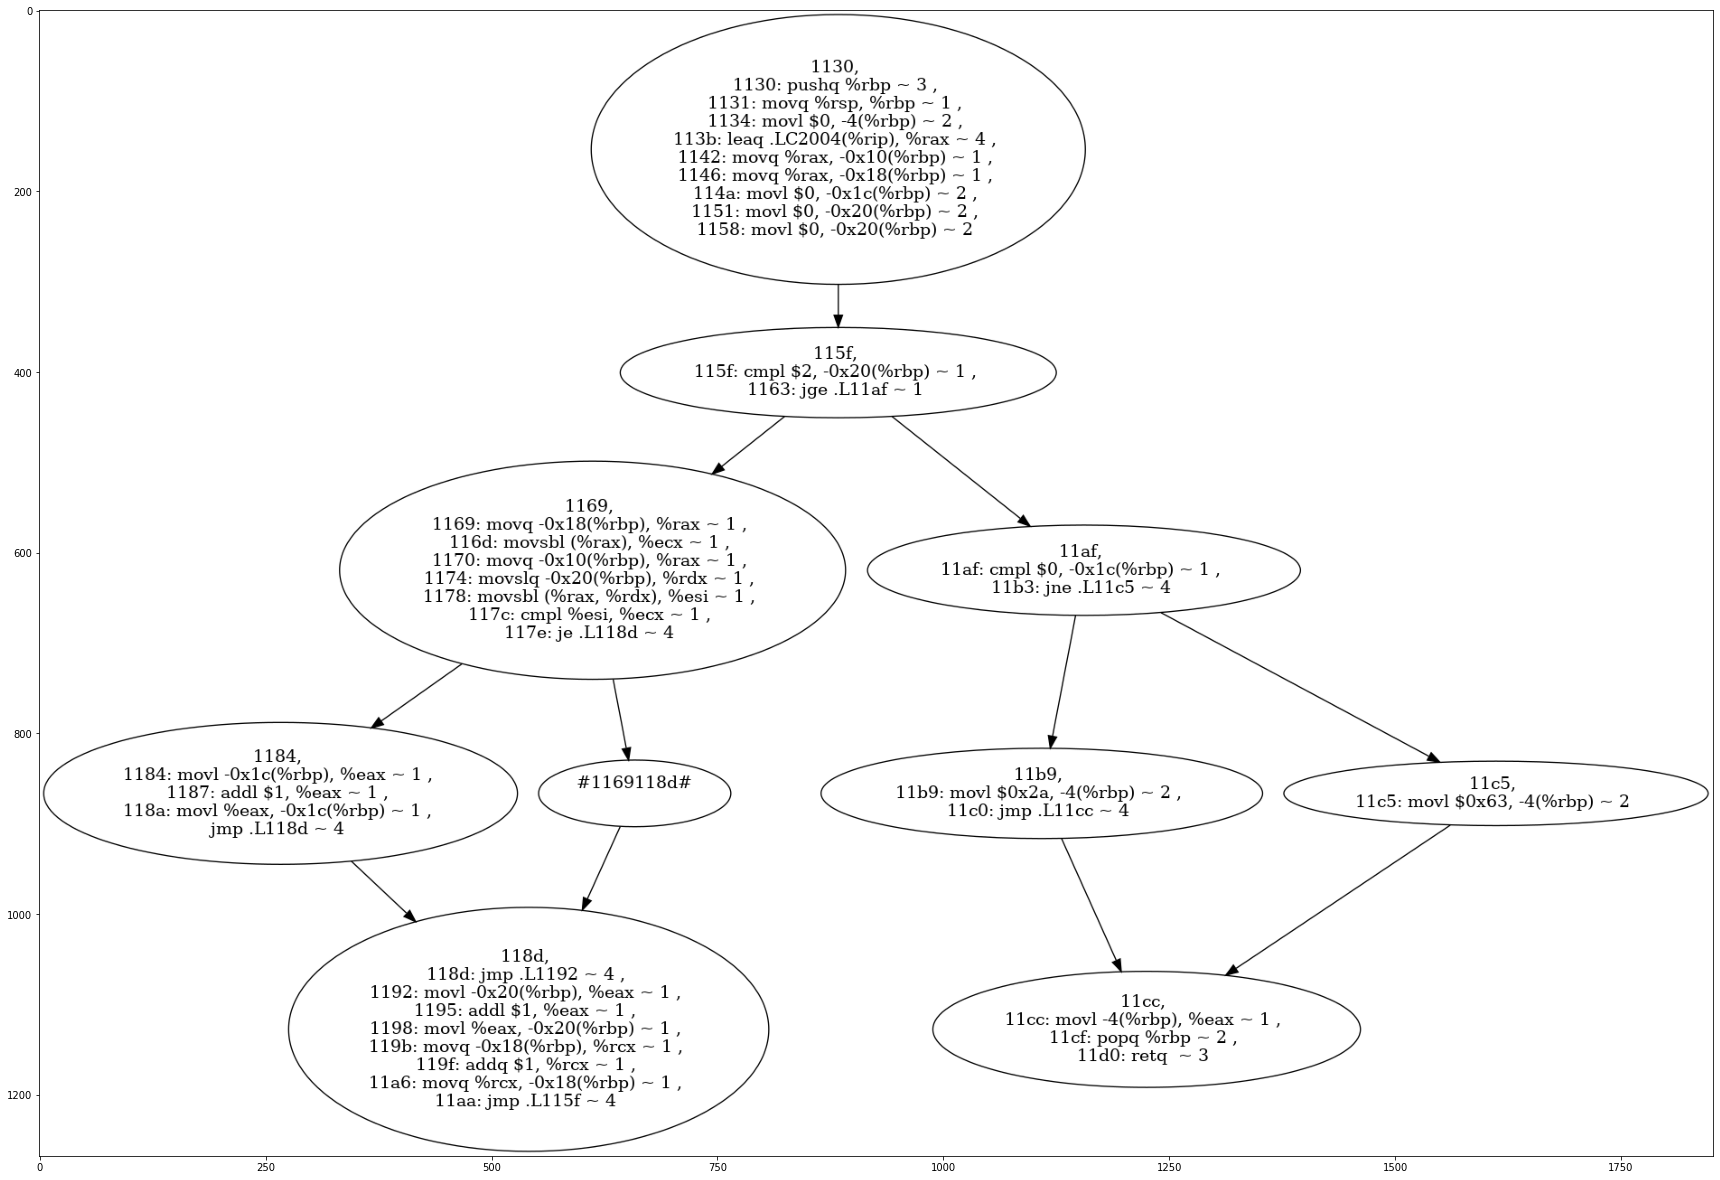

In [7]:
from rwtools.nemesis.graph.utils import create_graph_structure
from rwtools.nemesis.graph.utils import to_img
from rwtools.nemesis.graph.balance import balance_branching_point


outputfile = "./password_comparison/password_comparison_rw.s"
loader, rw = setup(binary, outputfile)
function_names = loader.container.function_names
nodes, graph = create_graph_structure(loader.container, "main")
fig, axs = plt.subplots(1, figsize=(30, 30))

control_flow_graph = ControlFlowGraph(nodes=nodes, graph=graph)

control_flow_graph.merge_consecutive_nodes()


control_flow_graph.unwind_graph()

control_flow_graph.insert_nodes()

axs.imshow(to_img(graph))


control_flow_graph.equalize_branches()


target_node = control_flow_graph.get_node('115f')
control_flow_graph.set_stopping_nodes(target_node)
balance_branching_point(control_flow_graph, target_node)


control_flow_graph.restore_cycles()
# axs[0].imshow(to_img(graph))

# target_node = control_flow_graph.get_node('11af')

# axs[1].imshow(to_img(graph))


# Merging inserted nodes 
You should always (I think) insert nodes into its sucessor. 
This is because the predecessors last instruction is a jump instruction. Inserting 
nodes after this jump is most likely not correct 

[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3e20
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8
warning, no nop instruction found with latency 4
1169118d


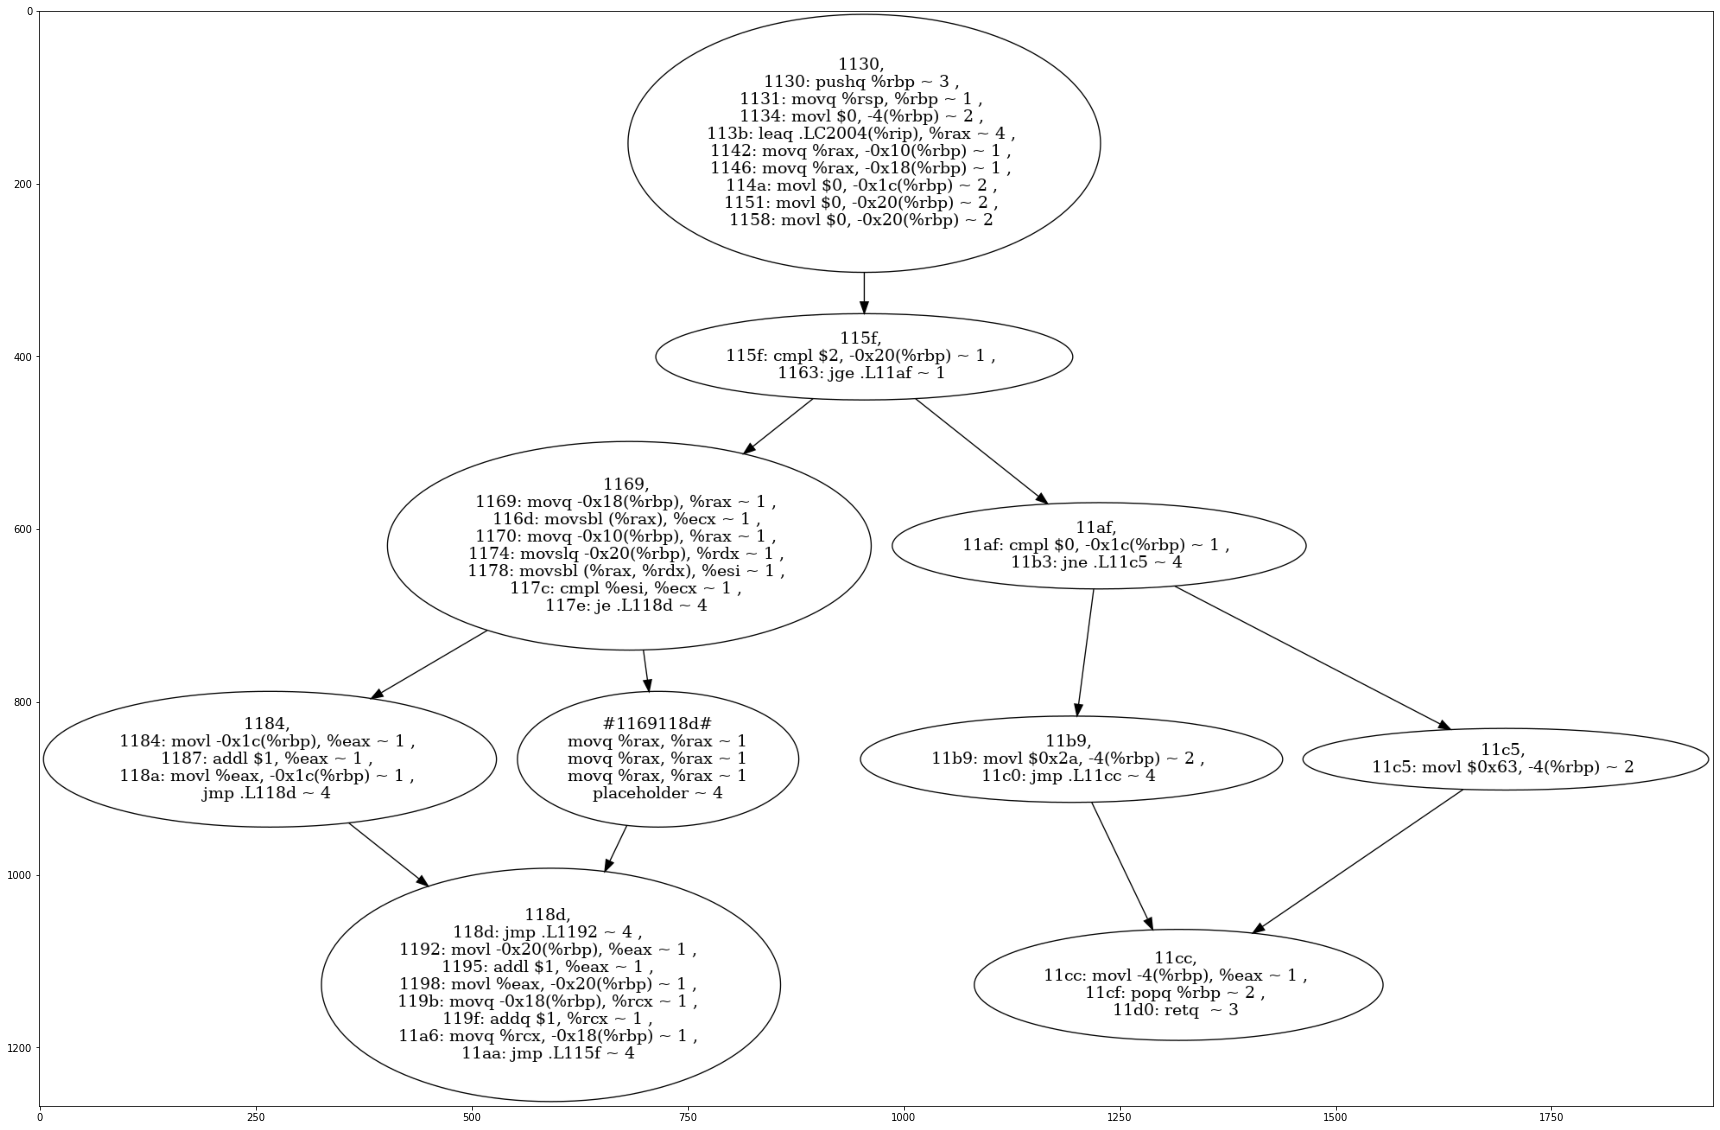

In [8]:
from rwtools.nemesis.graph.utils import create_graph_structure
from rwtools.nemesis.graph.utils import to_img
from rwtools.nemesis.graph.balance import balance_branching_point


outputfile = "./orig.s"
loader, rw = setup(binary, outputfile)
rw.dump()
function_names = loader.container.function_names
nodes, graph = create_graph_structure(loader.container, "main")
fig, axs = plt.subplots(1, figsize=(30, 30))

control_flow_graph = ControlFlowGraph(nodes=nodes, graph=graph)

control_flow_graph.merge_consecutive_nodes()


control_flow_graph.unwind_graph()

control_flow_graph.insert_nodes()
# control_flow_graph.equalize_branches()


target_node = control_flow_graph.get_node('1169')
control_flow_graph.set_stopping_nodes(target_node)
balance_branching_point(control_flow_graph, target_node)

# control_flow_graph.restore_cycles()

target_node = control_flow_graph.get_node('11af')

axs.imshow(to_img(graph))

control_flow_graph.merge_inserted_nodes()

